In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
m_drug_data = pd.read_csv(mouse_drug_data_to_load)
cl_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug_trial_df = pd.merge(m_drug_data, cl_trial_data, how='left', on='Mouse ID')

# Display the data table for preview
drug_trial_df.head(20)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
# Convert data to groupby object according to drug
gb_drug = drug_trial_df.groupby(['Drug', 'Timepoint'])


# Convert to DataFrame
gb_drug_tumor_size_mean = pd.DataFrame(
    gb_drug['Tumor Volume (mm3)'].mean()
)

# Format the columns
gb_drug_tumor_size_mean.reset_index(
    level=['Timepoint', 'Drug'], 
    inplace=True
)

gb_drug_tumor_size_mean.rename(
    index=str, 
    columns={'Tumor Volume (mm3)':'Mean Tumor Volume (mm3)'}, 
    inplace=True
)

# Preview DataFrame
gb_drug_tumor_size_mean.head(11)

,Drug,Timepoint,Mean Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# and Convert to DataFrame
gb_drug_tumor_size_std_err = pd.DataFrame(
    gb_drug['Tumor Volume (mm3)'].sem())

gb_drug_tumor_size_std_err.reset_index(
    level=['Timepoint', 'Drug'], 
    inplace=True
)

gb_drug_tumor_size_std_err.rename(
    index=str, 
    columns={'Tumor Volume (mm3)':'Std Error of Tumor Volume (mm3)'}, 
    inplace=True
)

# Preview DataFrame
gb_drug_tumor_size_std_err.head()


,Drug,Timepoint,Std Error of Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
gb_drug_tumor_size_mean_munged = pd.pivot_table(
                                    gb_drug_tumor_size_mean, 
                                    values='Mean Tumor Volume (mm3)',
                                    index='Timepoint', 
                                    columns='Drug'
)

gb_drug_tumor_size_std_err_munged = pd.pivot_table(
                                    gb_drug_tumor_size_std_err, 
                                    values='Std Error of Tumor Volume (mm3)', 
                                    index='Timepoint', 
                                    columns='Drug'
)
# Preview that Reformatting worked
gb_drug_tumor_size_mean_munged.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
gb_drug_tumor_size_std_err_munged.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


Text(0, 0.5, 'Tumor Size (mm3)')

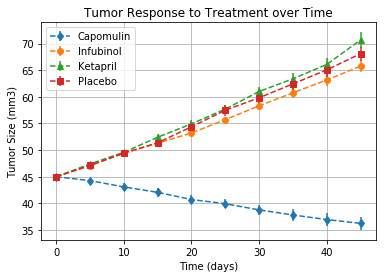

In [6]:
# Generate the Plot (with Error Bars)

gb_drug_tumor_size_mean_munged.reset_index(inplace=True)


markers=['d', 'o', '^', 's']
columns=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

fig, ax = plt.subplots()

for drug in range(len(columns)):
    tumor_size_plt = ax.errorbar(
        gb_drug_tumor_size_mean_munged['Timepoint'],
        gb_drug_tumor_size_mean_munged[f'{columns[drug]}'],
        yerr=gb_drug_tumor_size_std_err_munged[f'{columns[drug]}'],
        fmt=f'--{markers[drug]}'
)

plt.grid()
plt.legend()
plt.title('Tumor Response to Treatment over Time')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Size (mm3)')

# Save the Figure

In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert data to groupby object according to drug
gb_drug = drug_trial_df.groupby(['Drug', 'Timepoint'])


# Convert to DataFrame
gb_drug_met_sites_mean = pd.DataFrame(
    gb_drug['Metastatic Sites'].mean()
)

# Format the columns
gb_drug_met_sites_mean.reset_index(
    level=['Timepoint', 'Drug'], 
    inplace=True
)

gb_drug_met_sites_mean.rename(
    index=str, 
    columns={'Metastatic Sites':'Mean Metastatic Sites'}, 
    inplace=True
)

# Preview DataFrame
gb_drug_met_sites_mean.head(11)



,Drug,Timepoint,Mean Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
gb_drug_met_sites_std_err = pd.DataFrame(
    gb_drug['Metastatic Sites'].sem())

gb_drug_met_sites_std_err.reset_index(
    level=['Timepoint', 'Drug'], 
    inplace=True
)

gb_drug_met_sites_std_err

gb_drug_met_sites_std_err.rename(
    index=str, 
    columns={'Metastatic Sites':'Std Error of Metastatic Sites'}, 
    inplace=True
)

# Preview DataFrame
gb_drug_met_sites_std_err.head()


,Drug,Timepoint,Std Error of Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
gb_drug_met_sites_mean_munged = pd.pivot_table(
                                    gb_drug_met_sites_mean, 
                                    values='Mean Metastatic Sites',
                                    index='Timepoint', 
                                    columns='Drug'
)

gb_drug_met_sites_std_err_munged = pd.pivot_table(
                                    gb_drug_met_sites_std_err, 
                                    values='Std Error of Metastatic Sites', 
                                    index='Timepoint', 
                                    columns='Drug'
)
# Preview that Reformatting worked
gb_drug_met_sites_mean_munged.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
gb_drug_met_sites_std_err_munged.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


Text(0, 0.5, 'Number of Metastatic Sites')

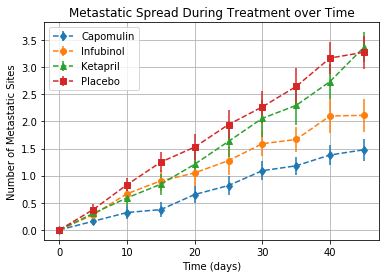

In [13]:
# Generate the Plot (with Error Bars)
gb_drug_met_sites_mean_munged.reset_index(inplace=True)

markers=['d', 'o', '^', 's']
columns=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

fig, ax = plt.subplots()

for drug in range(len(columns)):
    met_sites_plt = ax.errorbar(
        gb_drug_met_sites_mean_munged['Timepoint'],
        gb_drug_met_sites_mean_munged[f'{columns[drug]}'],
        yerr=gb_drug_met_sites_std_err_munged[f'{columns[drug]}'],
        fmt=f'--{markers[drug]}'
)

plt.grid()
plt.legend()
plt.title('Metastatic Spread During Treatment over Time')
plt.xlabel('Time (days)')
plt.ylabel('Number of Metastatic Sites')


In [ ]:
plt.show()

In [14]:
pd.to_numeric(drug_trial_df['Timepoint'])
drug_trial_df.dtypes

Mouse ID               object
Drug                   object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
gb_drug = drug_trial_df.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame
mice_count = pd.DataFrame(
    gb_drug['Mouse ID'].count()
)

mice_count.reset_index(
    level=['Drug', 'Timepoint'],
    inplace=True)

mice_count.rename(
    index=str, 
    columns={'Mouse ID':'Count of Mice'}, 
    inplace=True
)


# Preview DataFrame
mice_count.head()

,Drug,Timepoint,Count of Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [19]:
# Minor Data Munging to Re-Format the Data Frames

# Convert to pivot table first, then 
# worry about percentages.
mice_count_munged = pd.pivot_table(
                        mice_count, 
                        values='Count of Mice',
                        index='Timepoint',
                        columns='Drug'
)


# Preview the Data Frame

mice_count_munged.reset_index(inplace=True)
print(mice_count_munged.dtypes)


Drug
Timepoint    int64
Capomulin    int64
Ceftamin     int64
Infubinol    int64
Ketapril     int64
Naftisol     int64
Placebo      int64
Propriva     int64
Ramicane     int64
Stelasyn     int64
Zoniferol    int64
dtype: object


In [40]:
# Generate df with percent changes

columns = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

mice_pct_change = {
    'Timepoint': list(range(0,50,5)),
    'Capomulin': [],
    'Infubinol': [],
    'Ketapril': [],
    'Placebo': []
}


# For each drug, find the first index and store it in a variable.
# Then, calculate the pct_diff for each value including and following that
# first index. 

    
for i, row in mice_count_munged.iterrows():
        for drug in range(len(columns)):
            timepoint_zero = mice_count_munged.iloc[0][columns[drug]]
            pct_diff = (timepoint_zero - mice_count_munged.iloc[i][columns[drug]])/timepoint_zero 
            pct_change_from_init = (1 - pct_diff) * 100
            pct_change_from_init = int(pct_change_from_init)
            mice_pct_change[columns[drug]].append(pct_change_from_init)


mice_pct_change = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in mice_pct_change.items() ]))
mice_pct_change

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,100,100,100,100
1,5,100,100,92,96
2,10,100,84,88,96
3,15,96,84,76,80
4,20,92,80,76,76
5,25,88,72,76,68
6,30,88,68,72,60
7,35,88,48,68,56
8,40,84,40,60,48
9,45,84,36,43,43


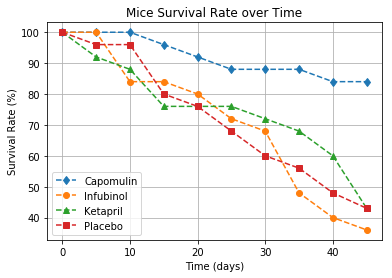

In [44]:
markers=['d', 'o', '^', 's']
columns=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

fig, ax = plt.subplots()

for drug in range(len(columns)):
    mice_survival_plt = ax.errorbar(
        mice_pct_change['Timepoint'],
        mice_pct_change[f'{columns[drug]}'],
        yerr=None,
        fmt=f'--{markers[drug]}'
)

plt.grid()
plt.legend()
plt.title('Mice Survival Rate over Time')
plt.xlabel('Time (days)')
plt.ylabel('Survival Rate (%)')

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [64]:
# Calculate the percent changes in tumor volume for each drug

tumor_size = drug_trial_df.groupby('Drug')
tumor_size_mean = pd.DataFrame(
    tumor_size['Tumor Volume (mm3)'].mean()
)

tumor_size_mean.reset_index(inplace=True)

tumor_size_mean.pct_change

# Display the data to confirm
tumor_size_mean.head(20)


,Drug,Tumor Volume (mm3)
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.957935
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.322552
7,Ramicane,40.216745
8,Stelasyn,54.106357
9,Zoniferol,53.236507


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()